In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [3]:
# 데이터 불러오기
df = pd.read_csv("data/고객db_확장본3.csv")

In [4]:
# 차량 구매 서비스 플랫폼 -> 회원 정보, 구매 정보 포함
df

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,"35,170,000",신용카드,1,오프라인
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,"85,790,000",신용카드,5,오프라인
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,"69,500,000",계좌이체,1,오프라인
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,"34,920,000",현금,1,오프라인
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,"50,230,000",신용카드,1,오프라인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,jihungim,2023-03-06,신규,준중형 세단,G80 (RG3),2024-12-20,"86,770,000",신용카드,2,온라인
288,289,최춘자,1976-06-27,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,jinho50,2024-08-26,신규,준대형 세단,Avante (CN7 N),2023-08-24,"69,510,000",현금,3,오프라인
289,290,차서준,1968-01-22,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,jihun41,2023-01-02,vip,준대형 세단,NEXO (FE),2024-01-12,"39,890,000",계좌이체,2,온라인
290,291,안정희,1984-01-10,남,051-406-1803,donghyeonbae@joyunson.com,대구광역시 수성구 범어동 55-3,yeongil47,2023-04-08,신규,소형 해치백,G80 (RG3),2024-01-30,"44,530,000",현금,2,온라인


In [5]:
df = df.rename(columns={
    "이름 (Name)": "이름",
    "생년월일 (Date of Birth)": "생년월일",
    "성별 (Gender)": "성별",
    "이메일 (Email)": "이메일",
    "휴대폰번호 (Phone Number)": "휴대폰 번호",
    "주소 (Address)": "주소",
    "아이디 (User ID)": "아이디",
    "가입일 (Registration Date)": "가입일",
    "고객 세그먼트 (Customer Segment)": "고객 등급",
    "차량구분(vehicle types)": "차량 유형",
    "구매한 제품 (Purchased Product)": "최근 구매 제품",
    "제품 구매 날짜 (Purchase Date)": "최근 구매 날짜",
    "거래 금액 (Transaction Amount)": "최근 거래 금액",
    "거래 방식 (Transaction Method)": "선호 거래 방식",
    "제품 구매 빈도 (Purchase Frequency)": "차량 구매 횟수",
    "제품 구매 경로 (Purchase Path)": "선호 구매 경로"
})

In [6]:
# 구매 금액 숫자로 변환
df["최근 거래 금액"] = df["최근 거래 금액"].str.replace(",", "").astype(int)

In [7]:
# 구매 당시 나이 계산
df["최근 구매 당시 나이"] = df["최근 구매 날짜"].str.split("-").str.get(0).astype(int) - df["생년월일"].str.split("-").str.get(0).astype(int)

In [8]:
# 현재 나이 계산
df["현재 나이"] = 2025 - df["생년월일"].str.split("-").str.get(0).astype(int)

In [13]:
# 20대, 30대 등으로 연령대 나눈 컬럼
def age_group(age) :
    age = str(age // 10 * 10) + "대"
    if (age % 10) < 3 :
        dist = "초반"
    elif (age % 10) < 7 :
        dist = "중반"
    else :
        dist = "후반"
    return age + dist

df["연령대"] = df["현재 나이"].apply(age_group)

TypeError: not all arguments converted during string formatting

In [9]:
# 거주 지역 : 시 단위로 추출
df["거주 지역"] = df["주소"].str.split("시").str.get(0) + "시"

In [10]:
# 구매 날짜가 현재 이후인 데이터 삭제
df = df[df["최근 구매 날짜"] < "2025-03-20"]

In [11]:
# 마지막 구매 이후 경과 기간 컬럼 생성
df["마지막 구매 이후 경과 기간"] = (pd.to_datetime("2025-03-20") - pd.to_datetime(df["최근 구매 날짜"])).dt.days

In [12]:
# 구매 시점 컬럼 추가
def get_season(date):
    month = int(date.split("-")[1])
    if month in [1, 2, 3]:
        return "1분기"
    elif month in [4, 5, 6]:
        return "2분기"
    elif month in [7, 8, 9]:
        return "3분기"
    else:
        return "4분기"

df["최근 구매 시점"] = df["최근 구매 날짜"].apply(get_season)

print(df[["최근 구매 날짜", "최근 구매 시점"]].head())

     최근 구매 날짜 최근 구매 시점
0  2024-04-04      2분기
1  2025-02-10      1분기
2  2025-03-10      1분기
3  2023-05-01      2분기
4  2023-10-01      4분기


In [13]:
# 차량 유형 컬럼 명확하게 정리
vehicle_mapping = {
    "Avante (CN7 N)": "준중형 세단",
    "Avante (CN7 HEV)": "준중형 세단",
    "Grandeur (GN7 HEV)": "준대형 세단",
    "G80 (RG3)": "대형 세단",
    "Santa-Fe ™": "중형 SUV",
    "Santa-Fe (MX5 PHEV)": "중형 SUV",
    "Tucson (NX4 PHEV)": "준중형 SUV",
    "Palisade (LX2)": "준대형 SUV",
    "IONIQ (AE EV)": "준중형 해치백",
    "IONIQ 6 (CE)": "중형 세단",
    "NEXO (FE)": "중형 SUV",
    "G90 (HI)": "대형 세단",
    "G70 (IK)": "중형 세단",
    "i30 (PD)": "준중형 해치백",
    "GV80 (RS4)": "대형 SUV",
    "G90 (RS4)": "프리미엄 세단"
}

df["차량 유형"] = df["최근 구매 제품"].map(vehicle_mapping)

In [14]:
# 연료 구분 컬럼 추가
car_fuel_mapping = {
    "Avante (CN7 N)": "휘발유",
    "Avante (CN7 HEV)": "하이브리드",
    "Grandeur (GN7 HEV)": "하이브리드",
    "G80 (RG3)": "휘발유",
    "Santa-Fe ™": "디젤",
    "Santa-Fe (MX5 PHEV)": "플러그인 하이브리드",
    "Tucson (NX4 PHEV)": "플러그인 하이브리드",
    "Palisade (LX2)": "디젤",
    "IONIQ (AE EV)": "전기",
    "IONIQ 6 (CE)": "전기",
    "NEXO (FE)": "수소",
    "G90 (HI)": "휘발유",
    "G70 (IK)": "휘발유",
    "i30 (PD)": "휘발유",
    "GV80 (RS4)": "디젤",
    "G90 (RS4)": "휘발유"
}

df["연료 구분"] = df["최근 구매 제품"].map(car_fuel_mapping)

In [15]:
# 회원 세그먼트 컬럼 내용 변경
# VIP : 2회 이상 구매한 회원
# 일반 : 최근 6개월 이전 차량 구매한 회원
# 신규 : 최근 6개월 이내 차량 구매한 회원

def get_segment(date, count):
    if count >= 2:
        return "VIP"
    elif date >= "2024-09-20":
        return "신규"
    else:
        return "일반"

df["고객 등급"] = df.apply(
    lambda row: get_segment(row["최근 구매 날짜"], row["차량 구매 횟수"]),
    axis=1
    )

In [16]:
# 고객 구분 컬럼 추가
# 이메일 도메인이 himedia.co.kr인 경우 법인, 그 외는 개인
def get_client_type(email):
    domain = email.split("@")[1]
    if domain == "himedia.co.kr":
        return "법인"
    else:
        return "개인"

df["고객 구분"] = df["이메일"].apply(get_client_type)

print(df[["이메일", "고객 구분"]].head())

                            이메일 고객 구분
0          janisi@himedia.co.kr    법인
1  kimkyoungsoo31@himedia.co.kr    법인
2      kimdaeun26@himedia.co.kr    법인
3       kimminsu1@himedia.co.kr    법인
4  kimseunghyun20@himedia.co.kr    법인


In [17]:
# 가입 이후 경과 기간 컬럼 추가
df["가입 이후 경과 기간"] = (pd.to_datetime("2025-03-20") - pd.to_datetime(df["가입일"])).dt.days

In [18]:
# 인구 밀도 컬럼 추가
# e-나라지표 참고 (https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1007)
pop_density = {
    '인천광역시':2820, '광주광역시':2921, '부산광역시':4258, '전라남도 목포시':4093, '경기도 수원시':9879, '울산광역시':1041, '서울특별시':15533,
       '경상남도 창원시':1338, '전라북도 전주시':3099, '충청북도 청주시':907, '경기도 성남시':6467, '경상북도 포항시':436,
       '충청남도 천안시':1036, '대구광역시':2666, '대전광역시':2731
}

df["인구 밀도"] = df["거주 지역"].map(pop_density)

In [19]:
# 차량 유형 컬럼 두 개로 분리
df["차량 사이즈"] = df["차량 유형"].str.split(" ").str.get(0)
df["차량 유형"] = df["차량 유형"].str.split(" ").str.get(1)

In [20]:
# 서비스 가입 이후 구매 이력이 존재하는지 파악하는 컬럼 추가
# 최초 구매자에게 혜택 제공하는 근거로 사용 가능
def is_first(reg_date, pur_date):
    date_diff = (pd.to_datetime(pur_date) - pd.to_datetime(reg_date)).days
    if date_diff < 0 :
        return "X"
    else:
        return "O"
    
df["회원가입 이후 구매 이력"] = df.apply(lambda row: is_first(row["가입일"], row["최근 구매 날짜"]), axis=1)

In [21]:
# 신차 구매 지수 (구매 횟수 * 구매 금액 / 가입 이후 경과 기간) 컬럼 추가
# 지수가 가장 높은 사람의 데이터 기준, 0~1 사이 값으로 정규화
# 가입 이후 경과 기간이 짧음에도 차량 구매 및 최근 거래 금액이 클 경우 신차 구매 지수가 높다고 볼 수 있음
df["신차 구매 지수"] = ((df["차량 구매 횟수"] * df["최근 거래 금액"] / df["가입 이후 경과 기간"])
 / ((df["차량 구매 횟수"] * df["최근 거래 금액"] / df["가입 이후 경과 기간"]).max())).round(3)

In [22]:
# 브랜드 충성도 지수 (차량 구매 횟수 * 가입 이후 경과 기간) 컬럼 추가
# 지수가 가장 높은 사람의 데이터 기준, 0~1 사이 값으로 정규화
# 가입 이후 경과 기간이 길고 차량 구매 횟수가 많을수록 충성도 지수가 높다고 볼 수 있음
df["브랜드 충성도 지수"] = ((df["차량 구매 횟수"] * df["가입 이후 경과 기간"])
 / ((df["차량 구매 횟수"] * df["가입 이후 경과 기간"]).max())).round(3)

In [23]:
#  "최근 구매 요일" 컬럼 추가 (구매 날짜 기반)
def get_day(date):
    day = date.dayofweek
    if day in [0, 1, 2, 3, 4]:
        return "평일"
    else:
        return "주말"

df["최근 구매 요일"] = pd.to_datetime(df["최근 구매 날짜"]).apply(get_day)

In [24]:
# 범위를 주고 랜덤 넘버 추출해내는 함수
def get_random_number(start, end):
    return np.random.randint(start, end)

# 연료 구분 컬럼 추가
car_price_mapping = {
    "Avante (CN7 N)": (3309,4143),
    "Avante (CN7 HEV)": (2485,3394),
    "Grandeur (GN7 HEV)": (4267,5982),
    "G80 (RG3)": (8275,9006),
    "Santa-Fe ™": (3492,5470),
    "Santa-Fe (MX5 PHEV)": (3870,5630),
    "Tucson (NX4 PHEV)": (3205,4485),
    "Palisade (LX2)": (4383,6377),
    "IONIQ (AE EV)": (6715,7941),
    "IONIQ 6 (CE)": (3695,5060),
    "NEXO (FE)": (6950,7224),
    "G90 (HI)": (12960,14287),
    "G70 (IK)": (4398,5113),
    "i30 (PD)": (1855,2850),
    "GV80 (RS4)": (6945,10460),
    "G90 (RS4)": (1752,18327)
}

# 차량 가격 범위 확인하는 함수
def set_car_price(row):
    start, end = car_price_mapping[row]
    return get_random_number(start, end)

# 최근 거래 금액 컬럼 수정
df["최근 거래 금액"]= df["최근 구매 제품"].apply(set_car_price) * 10000

In [25]:
# 지역별 GDP 데이터 딕셔너리
gdp_data = {
    "서울특별시": (548, 5161),
    "부산광역시": (114, 3000),
    "대구광역시": (90, 2674),
    "인천광역시": (117, 3000),
    "광주광역시": (52, 3090),
    "대전광역시": (64, 3000),
    "울산광역시": (26, 7751),
    "경기도 수원시": (594, 4649),
    "경기도 성남시": (594, 4649),
    "충청북도 청주시": (54, 3000),
    "충청남도 천안시": (143, 5894),
    "전라북도 전주시": (88, 3000),
    "전라남도 목포시": (73, 3000),
    "경상북도 포항시": (121, 3000),
    "경상남도 창원시": (127, 3000)
}

# GDP 데이터를 기존 데이터프레임에 추가
df["GDP (조 원)"] = df["거주 지역"].map(lambda x: gdp_data.get(x, (None, None))[0])
df["1인당 GDP (만 원)"] = df["거주 지역"].map(lambda x: gdp_data.get(x, (None, None))[1])

# 출처 : 통계청 지표누리

In [26]:
df

,연번,이름,생년월일,성별,휴대폰 번호,이메일,주소,아이디,가입일,고객 등급,...,고객 구분,가입 이후 경과 기간,인구 밀도,차량 사이즈,회원가입 이후 구매 이력,신차 구매 지수,브랜드 충성도 지수,최근 구매 요일,GDP (조 원),1인당 GDP (만 원)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,...,법인,719,2820,준중형,O,0.002,0.135,평일,117,3000
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,VIP,...,법인,39,2921,대형,O,0.508,0.037,평일,52,3090
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,...,법인,20,4258,중형,O,0.161,0.004,평일,114,3000
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,...,법인,692,4093,중형,O,0.002,0.130,평일,73,3000
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,일반,...,법인,549,9879,중형,O,0.004,0.103,주말,594,4649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,jihungim,2023-03-06,VIP,...,개인,745,3099,대형,O,0.011,0.280,평일,88,3000
288,289,최춘자,1976-06-27,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,jinho50,2024-08-26,VIP,...,개인,206,1036,준중형,X,0.047,0.116,평일,143,5894
289,290,차서준,1968-01-22,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,jihun41,2023-01-02,VIP,...,개인,808,1338,중형,O,0.005,0.304,평일,127,3000
290,291,안정희,1984-01-10,남,051-406-1803,donghyeonbae@joyunson.com,대구광역시 수성구 범어동 55-3,yeongil47,2023-04-08,VIP,...,개인,712,2666,대형,O,0.006,0.268,평일,90,2674


In [27]:
# 컬럼별 데이터 타입 확인 -> object는 문자열, int64는 정수
# 거래 금액은 문자열에서 정수로 바꾸어줄 필요
df.dtypes

연번                   int64
이름                  object
생년월일                object
성별                  object
휴대폰 번호              object
이메일                 object
주소                  object
아이디                 object
가입일                 object
고객 등급               object
차량 유형               object
최근 구매 제품            object
최근 구매 날짜            object
최근 거래 금액             int64
선호 거래 방식            object
차량 구매 횟수             int64
선호 구매 경로            object
최근 구매 당시 나이          int64
현재 나이                int64
연령대                 object
거주 지역               object
마지막 구매 이후 경과 기간      int64
최근 구매 시점            object
연료 구분               object
고객 구분               object
가입 이후 경과 기간          int64
인구 밀도                int64
차량 사이즈              object
회원가입 이후 구매 이력       object
신차 구매 지수           float64
브랜드 충성도 지수         float64
최근 구매 요일            object
GDP (조 원)            int64
1인당 GDP (만 원)        int64
dtype: object

In [28]:
df.columns

Index(['연번', '이름', '생년월일', '성별', '휴대폰 번호', '이메일', '주소', '아이디', '가입일', '고객 등급',
       '차량 유형', '최근 구매 제품', '최근 구매 날짜', '최근 거래 금액', '선호 거래 방식', '차량 구매 횟수',
       '선호 구매 경로', '최근 구매 당시 나이', '현재 나이', '연령대', '거주 지역', '마지막 구매 이후 경과 기간',
       '최근 구매 시점', '연료 구분', '고객 구분', '가입 이후 경과 기간', '인구 밀도', '차량 사이즈',
       '회원가입 이후 구매 이력', '신차 구매 지수', '브랜드 충성도 지수', '최근 구매 요일', 'GDP (조 원)',
       '1인당 GDP (만 원)'],
      dtype='object')

In [33]:
df = df.loc[:, ['연번', '이름', '생년월일', '현재 나이', '연령대', '성별', '휴대폰 번호', '이메일', '고객 구분', '아이디', '가입일', '가입 이후 경과 기간',
                 '주소', '거주 지역', '인구 밀도', 'GDP (조 원)', '1인당 GDP (만 원)', '고객 등급', '회원가입 이후 구매 이력', '최근 구매 제품', '차량 사이즈', '차량 유형',
                '연료 구분', '최근 구매 날짜', '최근 구매 시점', '최근 구매 요일', '마지막 구매 이후 경과 기간', '최근 구매 당시 나이', '최근 거래 금액', '선호 거래 방식',
                '선호 구매 경로', '차량 구매 횟수', '신차 구매 지수', '브랜드 충성도 지수']]

In [34]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,40920000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,86750000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,69540000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,48510000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,50330000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,88050000,신용카드,온라인,2,0.011,0.280
288,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,39990000,현금,오프라인,3,0.047,0.116
289,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,71120000,계좌이체,온라인,2,0.005,0.304
290,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,83040000,현금,온라인,2,0.006,0.268


In [35]:
df.to_csv("data/고객db_전처리.csv", index=False)

# 예측 모델 개발

In [36]:
# 전처리 기본 세팅
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,40920000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,86750000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,69540000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,48510000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,50330000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,88050000,신용카드,온라인,2,0.011,0.280
288,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,39990000,현금,오프라인,3,0.047,0.116
289,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,71120000,계좌이체,온라인,2,0.005,0.304
290,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,83040000,현금,온라인,2,0.006,0.268


In [38]:
# X, y 분할
X = df[["최근 거래 금액", "거주 지역", "차량 사이즈", "차량 유형", "연료 구분"]]
y = df["최근 구매 제품"]

In [39]:
# X = 최근 거래 금액, 거주 지역, 차량 사이즈, 차량 유형, 연료 구분
# y = 최근 구매 제품

In [40]:
X

,최근 거래 금액,거주 지역,차량 사이즈,차량 유형,연료 구분
0,40920000,인천광역시,준중형,세단,휘발유
1,86750000,광주광역시,대형,세단,휘발유
2,69540000,부산광역시,중형,SUV,수소
3,48510000,전라남도 목포시,중형,SUV,디젤
4,50330000,경기도 수원시,중형,세단,휘발유
...,...,...,...,...,...
287,88050000,전라북도 전주시,대형,세단,휘발유
288,39990000,충청남도 천안시,준중형,세단,휘발유
289,71120000,경상남도 창원시,중형,SUV,수소
290,83040000,대구광역시,대형,세단,휘발유


In [41]:
y

0      Avante (CN7 N)
1           G80 (RG3)
2           NEXO (FE)
3          Santa-Fe ™
4            G70 (IK)
            ...      
287         G80 (RG3)
288    Avante (CN7 N)
289         NEXO (FE)
290         G80 (RG3)
291         G80 (RG3)
Name: 최근 구매 제품, Length: 291, dtype: object

In [42]:
# 인코더 생성
label = LabelEncoder()
onehot = OneHotEncoder()

In [43]:
X = pd.get_dummies(X, columns=["거주 지역", "차량 사이즈", "차량 유형", "연료 구분"])

In [44]:
X

,최근 거래 금액,거주 지역_경기도 성남시,거주 지역_경기도 수원시,거주 지역_경상남도 창원시,거주 지역_경상북도 포항시,거주 지역_광주광역시,거주 지역_대구광역시,거주 지역_대전광역시,거주 지역_부산광역시,거주 지역_서울특별시,...,차량 사이즈_프리미엄,차량 유형_SUV,차량 유형_세단,차량 유형_해치백,연료 구분_디젤,연료 구분_수소,연료 구분_전기,연료 구분_플러그인 하이브리드,연료 구분_하이브리드,연료 구분_휘발유
0,40920000,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,86750000,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,69540000,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,48510000,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4,50330000,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,88050000,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
288,39990000,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
289,71120000,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
290,83040000,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [45]:
y

0      Avante (CN7 N)
1           G80 (RG3)
2           NEXO (FE)
3          Santa-Fe ™
4            G70 (IK)
            ...      
287         G80 (RG3)
288    Avante (CN7 N)
289         NEXO (FE)
290         G80 (RG3)
291         G80 (RG3)
Name: 최근 구매 제품, Length: 291, dtype: object

# 데이터셋 분할

In [46]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# 고객 추천 모델 --> Classification
# GBM, Linear SVM, CatBoost, KNN, GaussianNB, MultinomialNB, BernoulliNB, MLP 필요
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
lr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
lgb = LGBMClassifier()
cb = CatBoostClassifier()

In [49]:
lr.fit(train_X, train_y)
svc.fit(train_X, train_y)
dtc.fit(train_X, train_y)
rfc.fit(train_X, train_y)
gbc.fit(train_X, train_y)
gnb.fit(train_X, train_y)
knn.fit(train_X, train_y)
lgb.fit(train_X, train_y)
cb.fit(train_X, train_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 232, number of used features: 11
[LightGBM] [Info] Start training from score -1.757858
[LightGBM] [Info] Start training from score -1.640075
[LightGBM] [Info] Start training from score -1.835819
[LightGBM] [Info] Start training from score -5.446737
[LightGBM] [Info] Start training from score -3.500827
[LightGBM] [Info] Start training from score -4.348125
[LightGBM] [Info] Start training from score -5.446737
[LightGBM] [Info] Start training from score -1.685537
[LightGBM] [Info] Start training from score -4.348125
[LightGBM] [Info] Start training from score -5.446737
[LightGBM] [Info] Start training from score -1.596590
[LightGBM] [Info] Start training from sco

In [50]:
y_pred_lr = lr.predict(test_X)
y_pred_svc = svc.predict(test_X)
y_pred_dtc = dtc.predict(test_X)
y_pred_rfc = rfc.predict(test_X)
y_pred_gbc = gbc.predict(test_X)
y_pred_gnb = gnb.predict(test_X)
y_pred_knn = knn.predict(test_X)
y_pred_lgb = lgb.predict(test_X)
y_pred_cb = cb.predict(test_X)

In [51]:
# 정확도 확인
print("Logistic Regression 정확도 : ", accuracy_score(test_y, y_pred_lr))
print("SVM 정확도 : ", accuracy_score(test_y, y_pred_svc))
print("Decision Tree 정확도 : ", accuracy_score(test_y, y_pred_dtc))
print("Random Forest 정확도 : ", accuracy_score(test_y, y_pred_rfc))
print("Gradient Boosting 정확도 : ", accuracy_score(test_y, y_pred_gbc))
print("Gaussian Naive Bayes 정확도 : ", accuracy_score(test_y, y_pred_gnb))
print("KNN 정확도 : ", accuracy_score(test_y, y_pred_knn))
print("LightGBM 정확도 : ", accuracy_score(test_y, y_pred_lgb))
print("CatBoost 정확도 : ", accuracy_score(test_y, y_pred_cb))

Logistic Regression 정확도 :  0.15254237288135594
SVM 정확도 :  0.711864406779661
Decision Tree 정확도 :  0.9830508474576272
Random Forest 정확도 :  0.9830508474576272
Gradient Boosting 정확도 :  0.9830508474576272
Gaussian Naive Bayes 정확도 :  0.7627118644067796
KNN 정확도 :  0.711864406779661
LightGBM 정확도 :  0.9830508474576272
CatBoost 정확도 :  0.9830508474576272


### dtc, rfc, gbc, lgb, cb 모델의 정확도가 높음

In [52]:
test_X

,최근 거래 금액,거주 지역_경기도 성남시,거주 지역_경기도 수원시,거주 지역_경상남도 창원시,거주 지역_경상북도 포항시,거주 지역_광주광역시,거주 지역_대구광역시,거주 지역_대전광역시,거주 지역_부산광역시,거주 지역_서울특별시,...,차량 사이즈_프리미엄,차량 유형_SUV,차량 유형_세단,차량 유형_해치백,연료 구분_디젤,연료 구분_수소,연료 구분_전기,연료 구분_플러그인 하이브리드,연료 구분_하이브리드,연료 구분_휘발유
85,89950000,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
260,86030000,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
46,39740000,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
177,49390000,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
144,40020000,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
126,35260000,False,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
227,72150000,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
119,45850000,False,True,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
10,134060000,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
91,43650000,False,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


In [53]:
new_data = np.array([35000000, 0,0,1,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,1,0, 1,0,0, 0,0,0,0,0,1]).reshape(1, 30)

In [54]:
recom_list = []

In [55]:
recom_list.append(dtc.predict(new_data)[0])
recom_list.append(rfc.predict(new_data)[0])
recom_list.append(gbc.predict(new_data)[0])
recom_list.append(lgb.predict(new_data)[0])
recom_list.append(cb.predict(new_data)[0][0])

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [56]:
recom_list

['G70 (IK)', 'Santa-Fe ™', 'G70 (IK)', 'G70 (IK)', 'Santa-Fe ™']

In [57]:
recom_list = list(set(recom_list))

In [58]:
# 추천 결과 하나씩 보여주기
for i in recom_list :
    print(i)

Santa-Fe ™
G70 (IK)


# 비슷한 가격대 전기차 3대 추천

In [59]:
elec_car_compen = {
    "서울특별시": 9000000,
    "부산광역시": 10500000,
    "대구광역시": 11000000,
    "인천광역시": 10600000,
    "광주광역시": 11000000,
    "대전광역시": 12000000,
    "울산광역시": 10500000,
    "경기도 수원시": 10500000,
    "경기도 성남시": 11000000,
    "충청북도 청주시": 14000000,
    "충청남도 천안시": 14000000,
    "전라북도 전주시": 15000000,
    "전라남도 목포시": 15500000,
    "경상북도 포항시": 13000000,
    "경상남도 창원시": 13000000
}

if "연료 구분" in ["전기", "플러그인 하이브리드", "하이브리드"]:
     pass
else: # 추천 시작
     compen = elec_car_compen["서울특별시"]
     # df.loc[df["최근 거래 금액"] <= 45000000 + compen, "최근 구매 제품"].to_numpy()[0].head(3)

In [60]:
compen = elec_car_compen["서울특별시"]
recom_elec = df.loc[(df["최근 거래 금액"] <= 45000000 + compen) & (df["연료 구분"].isin(["전기", "플러그인 하이브리드", "하이브리드"])), "최근 구매 제품"].to_numpy()[0:3]

In [61]:
for i in recom_elec:
    print(i)

IONIQ 6 (CE)
Santa-Fe (MX5 PHEV)
Grandeur (GN7 HEV)


# 프로모션 : 신용카드 혜택 설명하면서 50% 비싼 차 추천 -> 옵션 붙인 걸로 생각하면 됨

In [62]:
prom_data = np.array([35000000 * 1.5, 0,0,1,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0,1,0, 1,0,0, 0,0,0,0,0,1]).reshape(1, 30)

In [63]:
prom_list = []

In [64]:
prom_list.append(dtc.predict(prom_data)[0])
prom_list.append(rfc.predict(prom_data)[0])
prom_list.append(gbc.predict(prom_data)[0])
prom_list.append(lgb.predict(prom_data)[0])
prom_list.append(cb.predict(prom_data)[0][0])

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [65]:
prom_list = list(set(prom_list))

In [66]:
prom_list

['NEXO (FE)', 'G70 (IK)']

In [67]:
# 프로모션 결과와 추천 결과 비교해서, 같은 결과는 제외하고 보여주기
# 모두 다 같으면 애초에 프로모션 안 함
for i in prom_list :
    if i not in recom_list :
        print(i)

NEXO (FE)


# 일반 고객에게 재구매 할인 혜택 공지

In [68]:
df.loc[df["고객 등급"] == "일반", ["이름", "휴대폰 번호", "이메일"]]

,이름,휴대폰 번호,이메일
0,강주온,010-6502-8753,janisi@himedia.co.kr
3,김민수,010-1234-5678,kimminsu1@himedia.co.kr
4,김승현,010-0123-4567,kimseunghyun20@himedia.co.kr
5,김영철,010-6789-0123,kimyoungcheol6@himedia.co.kr
6,김윤희,010-2345-6789,leesujin2@himedia.co.kr
...,...,...,...
256,윤병철,042-205-5394,wyu@gmail.com
258,오옥자,032-529-6473,hanyeweon@daum.net
260,허경수,063-010-5636,hayungo@yuhanhoesa.com
272,양은주,053-833-2005,cyun@hanmail.net


### 전시장 어디 위치하면 좋을까 : 지역별로 인구밀도가 높을수록, 사람들의 소비가 높을수록 전시장 위치하면 좋겠네?

In [69]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,40920000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,86750000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,69540000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,48510000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,50330000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,88050000,신용카드,온라인,2,0.011,0.280
288,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,39990000,현금,오프라인,3,0.047,0.116
289,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,71120000,계좌이체,온라인,2,0.005,0.304
290,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,83040000,현금,온라인,2,0.006,0.268


In [189]:
df.groupby("거주 지역")["GDP (조 원)"].mean().sort_values(ascending=False)

거주 지역
경기도 성남시     594.0
경기도 수원시     594.0
서울특별시       548.0
충청남도 천안시    143.0
경상남도 창원시    127.0
경상북도 포항시    121.0
인천광역시       117.0
부산광역시       114.0
대구광역시        90.0
전라북도 전주시     88.0
전라남도 목포시     73.0
대전광역시        64.0
충청북도 청주시     54.0
광주광역시        52.0
울산광역시        26.0
Name: GDP (조 원), dtype: float64

# 지금까지 어떻게 팔아왔나?

In [150]:
import plotly.express as px

In [71]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_79664/727121965.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["거주 지역", "연료 구분"])["연번"].count().unstack().reindex(columns=fuel_order).plot(


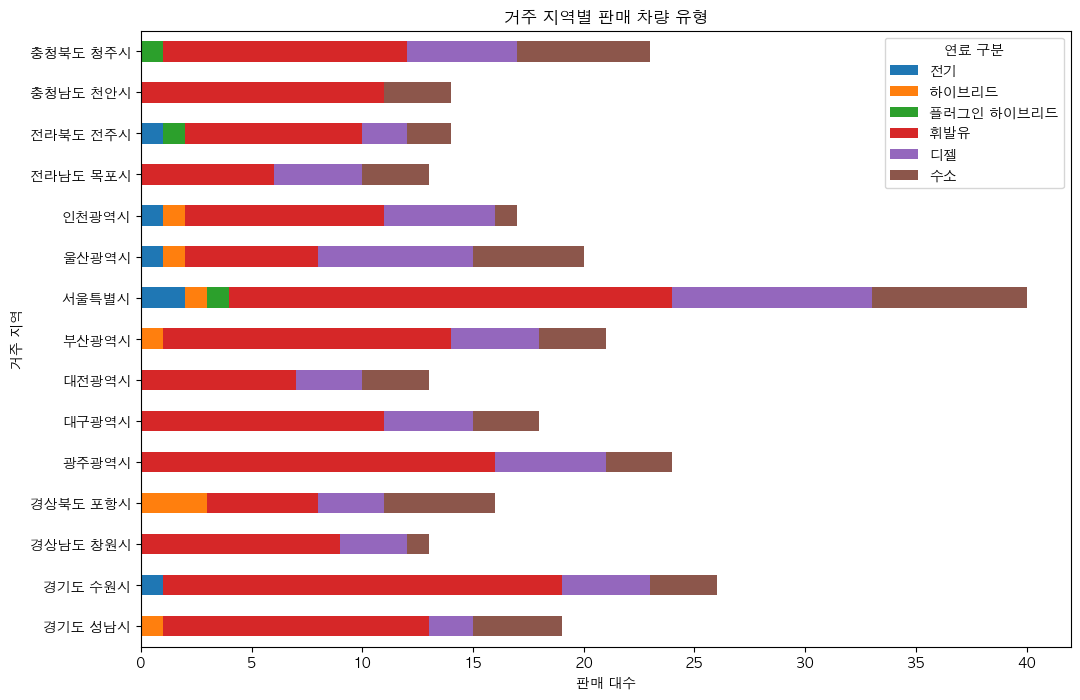

In [72]:
# 연료 구분 정렬 순서 지정
fuel_order = ["전기", "하이브리드", "플러그인 하이브리드", "휘발유", "디젤", "수소"]

# "연료 구분"을 Categorical 타입으로 변경하여 순서 지정
df["연료 구분"] = pd.Categorical(df["연료 구분"], categories=fuel_order, ordered=True)

# 그룹바이 후 연료 구분 순서대로 정렬하여 시각화
df.groupby(["거주 지역", "연료 구분"])["연번"].count().unstack().reindex(columns=fuel_order).plot(
    kind="barh", stacked=True, figsize=(12, 8)
)

plt.title("거주 지역별 판매 차량 유형")
plt.xlabel("판매 대수")
plt.ylabel("거주 지역")
plt.show()

In [ ]:
# 차량 구매 건수
# 서울, 수원, 광주, 청주, 울산 등이 높은 편
# 이유 : 인구 밀도가 높은 지역이기 때문

# 전기차 및 하이브리드 차량 구매 건수 : 전반적으로 높지 않음
# 서울, 포항, 울산 등이 그나마 많은 편

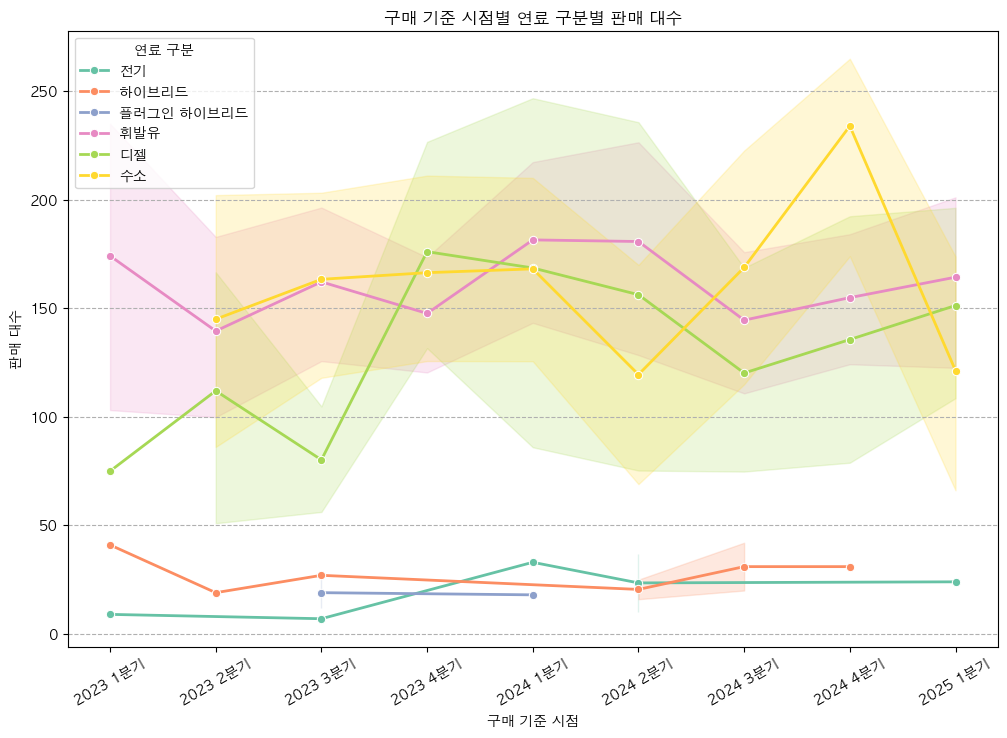

In [190]:
df["구매 기준 시점"] = df["최근 구매 날짜"].str.split("-").str.get(0) + " " + df["최근 구매 시점"]
date_order = ["2023 1분기", "2023 2분기", "2023 3분기", "2023 4분기", "2024 1분기", "2024 2분기", "2024 3분기", "2024 4분기", "2025 1분기"]

df["구매 기준 시점"] = pd.Categorical(df["구매 기준 시점"], categories=date_order, ordered=True)

# 구매 기준 시점별 각 연료 구분의 개수 시각화
# 각 연료 구분 별로 선으로 연결
# 라인 뒤 색칠 없이 선만 표시
plt.figure(figsize=(12, 8))
sb.lineplot(x="구매 기준 시점", y="연번", hue="연료 구분", data=df, marker="o", palette="Set2", lw=2)
plt.title("구매 기준 시점별 연료 구분별 판매 대수")
plt.xlabel("구매 기준 시점")
plt.ylabel("판매 대수")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")
plt.legend(title="연료 구분", loc="upper left")
plt.show()

In [ ]:
# 수소차 폭발 2024년 4분기에 잇따라... (https://biz.sbs.co.kr/article/20000208890?division=NAVER)
# 수소차 판매량 2025년 1분기 기점으로 하락세



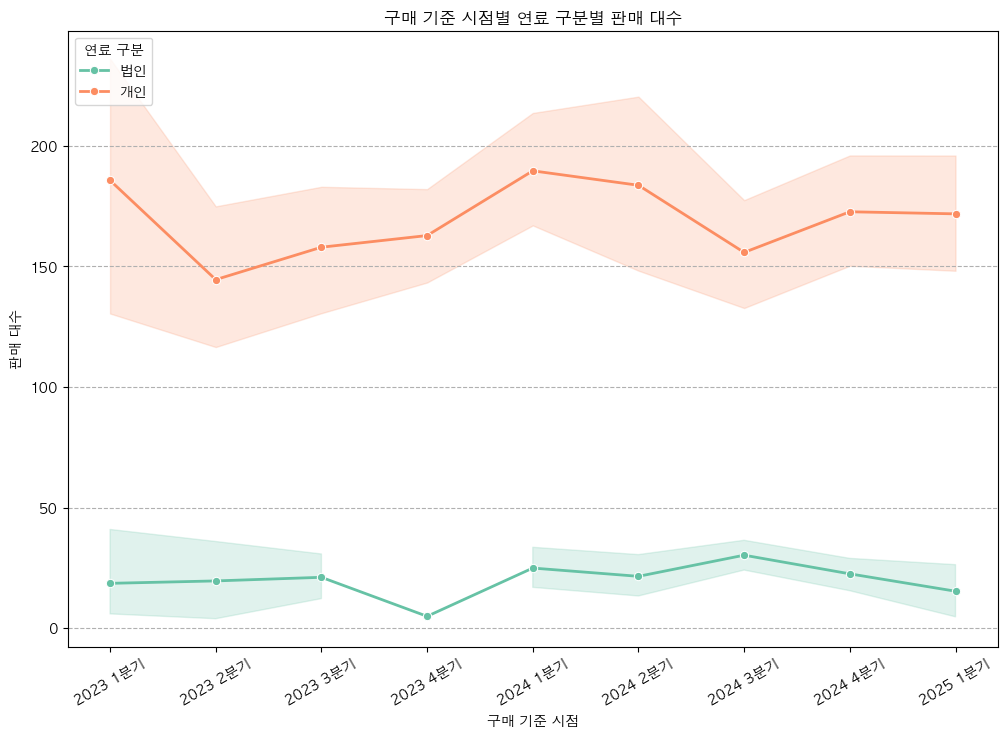

In [185]:
# 구매 기준 시점별 각 연료 구분의 개수 시각화
# 각 연료 구분 별로 선으로 연결
# 라인 뒤 색칠 없이 선만 표시
plt.figure(figsize=(12, 8))
sb.lineplot(x="구매 기준 시점", y="연번", hue="고객 구분", data=df, marker="o", palette="Set2", lw=2)
plt.title("구매 기준 시점별 연료 구분별 판매 대수")
plt.xlabel("구매 기준 시점")
plt.ylabel("판매 대수")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--")
plt.legend(title="연료 구분", loc="upper left")
plt.show()

In [ ]:
# 2023년 비트코인 가격 상승으로 인해 반도체 부족 현상 발생 (https://www.spglobal.com/mobility/en/info/kr/featured-headlines.html)
# 반도체 부족 현상으로 인해 차량 생산량 감소

# 2024년 2분기 이후도 비트코인 이슈로 인한 반도체 부족 현상 발생

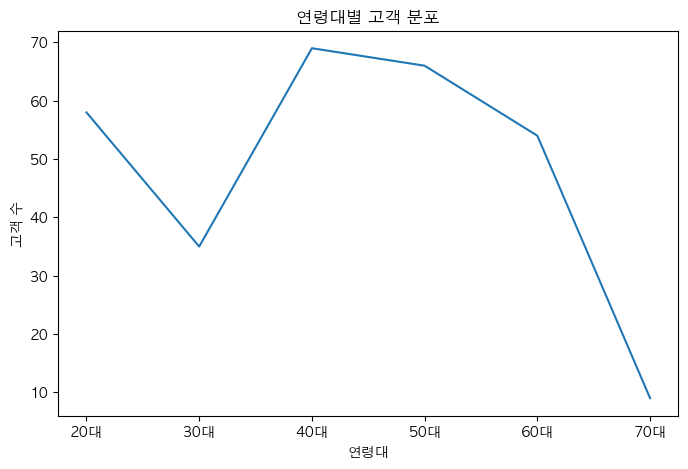

In [195]:
plt.figure(figsize=(8, 5))
df['연령대'].value_counts().sort_index().plot(kind='line')
plt.title("연령대별 고객 분포")
plt.xlabel("연령대")
plt.ylabel("고객 수")
plt.show()

In [192]:
# 40대 진입 이후 차량 구매 수요 증가하는 것으로 파악
# 잠재적 마케팅 대상을 30대 후반~40대 초반으로 설정

In [147]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수,최근 구매 연월
0,1,강주온,2002-03-04,23,20대,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,평일,350,22,40920000,신용카드,오프라인,1,0.002,0.135,2024-04
1,2,김경수,1983-01-02,42,40대,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,평일,38,42,86750000,신용카드,오프라인,5,0.508,0.037,2025-02
2,3,김다은,1999-05-02,26,20대,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,평일,10,26,69540000,계좌이체,오프라인,1,0.161,0.004,2025-03
3,4,김민수,1960-07-01,65,60대,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,평일,689,63,48510000,현금,오프라인,1,0.002,0.130,2023-05
4,5,김승현,1970-03-02,55,50대,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,주말,536,53,50330000,신용카드,오프라인,1,0.004,0.103,2023-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,67,60대,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,평일,90,66,88050000,신용카드,온라인,2,0.011,0.280,2024-12
288,289,최춘자,1976-06-27,49,40대,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,평일,574,47,39990000,현금,오프라인,3,0.047,0.116,2023-08
289,290,차서준,1968-01-22,57,50대,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,평일,433,56,71120000,계좌이체,온라인,2,0.005,0.304,2024-01
290,291,안정희,1984-01-10,41,40대,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,평일,415,40,83040000,현금,온라인,2,0.006,0.268,2024-01


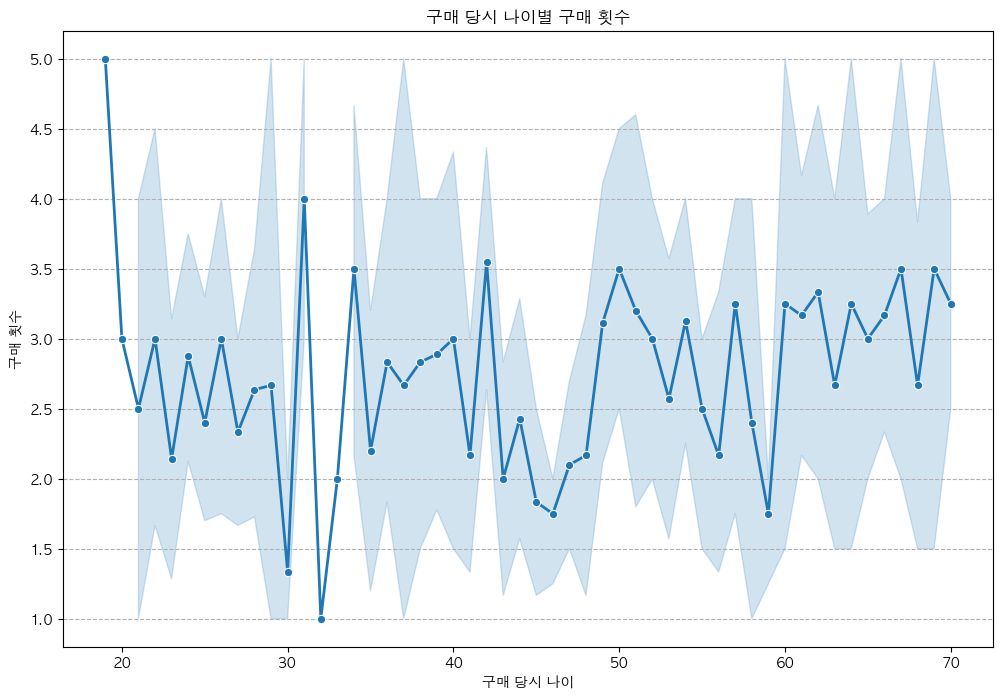

In [194]:
# 구매 당시 나이별 구매 횟수를 시각화하기
# 라인 플롯으로
plt.figure(figsize=(12, 8))
sb.lineplot(x="최근 구매 당시 나이", y="차량 구매 횟수", data=df, marker="o", lw=2)
plt.title("구매 당시 나이별 구매 횟수")
plt.xlabel("구매 당시 나이")
plt.ylabel("구매 횟수")
plt.grid(axis="y", linestyle="--")
plt.show()

In [74]:
# 잠재적인 고객층

# 20대 중후반에 구매 횟수가 가장 많음
# 40대 중반에도 구매 횟수가 증가하는 경향성
# 60대 중반에 구매 횟수 소폭 상승

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

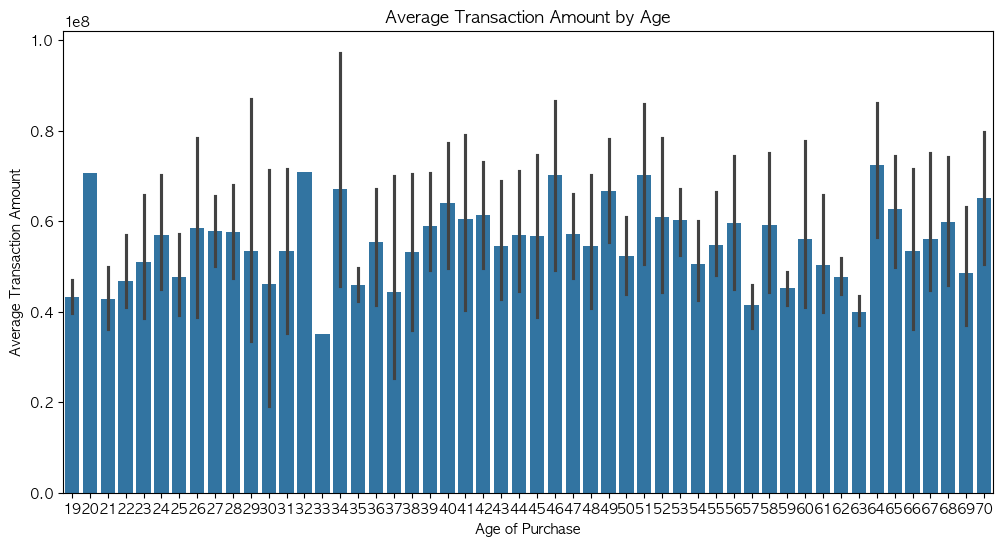

In [80]:
# 구매 당시 나이별 구매 금액을 시각화하기
# 바 플롯으로, 평균 구매 금액
plt.figure(figsize=(12, 6))
sb.barplot(data=df, x="최근 구매 당시 나이", y="최근 거래 금액")
plt.xlabel("Age of Purchase")
plt.ylabel("Average Transaction Amount")
plt.title("Average Transaction Amount by Age")
plt.show()

In [ ]:
# 30대 중반에 구매 금액이 가장 높음

<Figure size 1200x600 with 0 Axes>

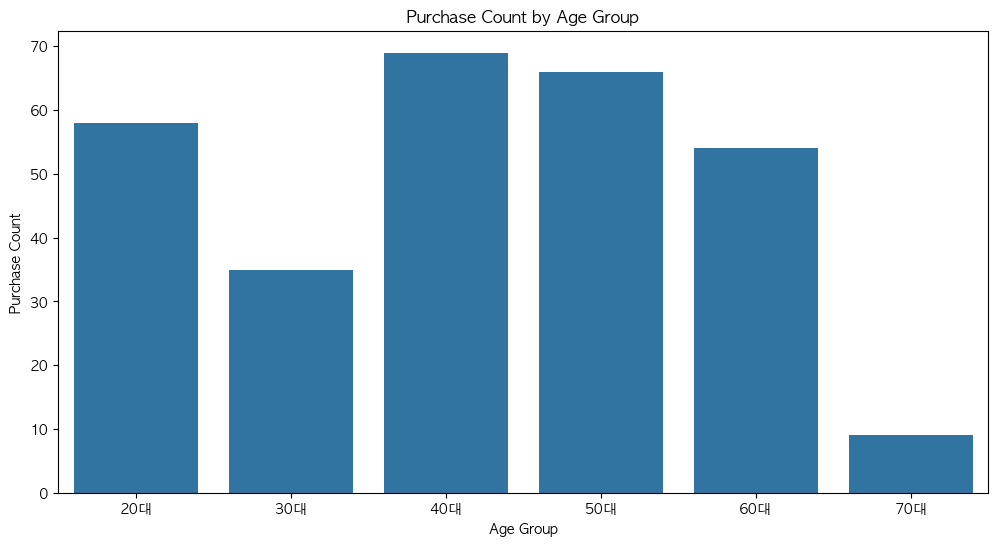

In [76]:
# 연령대별 구매 횟수를 시각화하기
# 바 플롯으로

# 연령대의 오름차순 정렬을 위해 정렬된 리스트 생성
age_order = sorted(df["연령대"].unique())

# 바 플롯 생성
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x="연령대", order=age_order)
plt.xlabel("Age Group")
plt.ylabel("Purchase Count")
plt.title("Purchase Count by Age Group")
plt.show()